# **Insurance Pricing Forecast Using XGBoost Regressor**


## Project Overview

- Insurance companies provide coverage for various expenses related to health and property. These expenses can include medical bills, home and vehicle damage, fire incidents, and financial losses. Calculating insurance premiums traditionally involves a lot of manual work and struggles to adapt to the growing complexity of data.

- To thrive, insurance companies need a reliable way to predict healthcare expenses and ensure they remain profitable. Our goal is to create a machine learning model that helps determine the rates by forecasting the charges or payments made by the health insurance company, thus maintaining profitability.

- In this project, our main focus will be on building an XGBoost Regressor. This model will estimate healthcare expenses based on various factors such as age, BMI, smoking habits, and more. Additionally, we'll explore how different factors are related, establish a simple regression model for comparison, and learn how to explain our findings to people who may not have technical backgrounds.

---

### Problem Statement

For insurance companies to be profitable, they need to collect more money in premiums than they pay out to policyholders who file valid claims. To achieve this, insurance companies must accurately predict healthcare costs.

- **Our goal is to make accurate predictions of healthcare costs based on the provided set of features.**

---

### Outcomes


* Understanding the insurance pricing problem statement
* Exploratory Data Analysis on Categorical and Continuous Data
* Univariate Data Analysis
* Bivariate Data Analysis
* Understand Correlation Analysis
* Categorical Correlation with Chi-squared 
* Correlation between Categorical and Target Variables with ANOVA
* Label Encoding for Categorical Variables
* Understanding Linear Regression Assumptions
* Implementing Linear Regression
* Validating Linear Regression Assumptions
* Understanding XGBoost Regressor
* Implementing XGBoost Regressor
* Building pipelines with Sklearn’s Pipeline operator
* Implementing BayesSearchCV for XGBoost Hyperparameter Optimization
* Evaluating Models with Regression Metrics - RMSE
* Presenting Non-Technical Metrics for Stakeholders

---


### Approach

1. **Exploratory Data Analysis (EDA)**: We'll begin by understanding the data.
   
2. **Build and evaluate a baseline linear model**:
    1. Ensure the data meets linear regression assumptions.
    2. Prepare the data.
    3. Train a linear model.
    4. Evaluate the model's performance.
   
3. **Improve on the baseline linear model**:
    1. Introduce a non-linear model called XGBoost.
    2. Prepare the data.
    3. Optimize the model training process using Sklearn's `Pipeline`.
    4. Evaluate the model.
    5. Compare it to the baseline model.

4. **Presenting the results to non-technical stakeholders**: Communicate our findings in a way that's easy for non-technical individuals to understand.

---

### Key Libraries

* **scikit-optimize**: [Scikit-optimize](https://scikit-optimize.github.io/stable/) is a Python library that helps improve machine learning models by optimizing them step by step.

* **category_encoders**: [Category encoders](https://contrib.scikit-learn.org/category_encoders/) are tools that transform categorical data into a format that machine learning models can understand.

* **xgboost**: [XGBoost](https://xgboost.readthedocs.io/en/stable/) is a versatile library for machine learning that is highly efficient. It's designed to solve a wide range of data science problems quickly and accurately.

---


### Install Packages


In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install numpy==1.21.0 --quiet
!pip install pandas==1.5.2 --quiet
!pip install plotly==5.11.0 --quiet
!pip install scikit-learn==1.2.0 --quiet
!pip install scikit-optimize==0.9.0 --quiet
!pip install statsmodels==0.13.5 --quiet
!pip install category_encoders==2.5.1 --quiet
!pip install xgboost==1.7.2 --quiet
!pip install projectpro --upgrade --quiet
!pip install nbformat==5.7.1 --quiet
!pip install matplotlib==3.6.2 --quiet

### Data Reading from Different Sources

In many cases, data is stored on your computer. To access this data, you need to specify the correct file path and name. Here's how you can do it for CSV files:

#### 1. **CSV Format**

CSV (Comma-Separated Values) is a way to store data in a table format. The data for this project is stored in a CSV file, which you can download [here](https://s3.amazonaws.com/projex.dezyre.com/insurance-pricing-forecast-using-regression-analysis/materials/data.zip).

You can read a CSV file using the following code:

```python
import pandas as pd
csv_file_path = "D:/ProjectPro/Insurance Pricing Forecast Using XGBoost Regressor/data/insurance.csv"
df = pd.read_csv(csv_file_path)
```

Make sure the `csv_file_path` is set correctly. If you encounter a "FileNotFoundError" or "No such file or directory" error, double-check the file path.

---

#### 2. **Public URL and Zip Folder**

You can also read data from a public URL. The data for this project is available [here](https://s3.amazonaws.com/projex.dezyre.com/insurance-pricing-forecast-using-regression-analysis/materials/data.zip).

ZIP files are used to compress one or more files into a single file. This makes it easier to transmit or store. To work with the data in the ZIP file, you can use the following code:

```python
from zipfile import ZipFile
import urllib.request
from io import BytesIO

folder = urllib.request.urlopen('https://s3.amazonaws.com/projex.dezyre.com/insurance-pricing-forecast-using-regression-analysis/materials/data.zip')
zipfile = ZipFile(BytesIO(folder.read()))
zipfile.namelist()

# Load the data into a data frame
df = pd.read_csv(zipfile.open('insurance.csv'))
```

This code will help you access the data stored in the ZIP file.

---


### **Import Libraries**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import sys
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import RFE
import projectpro
projectpro.checkpoint('1e808c')

And the functions in the `ml_pipeline` folder:

In [ ]:
# ml_pipeline folder should be in the same directory as the notebook, append the path and import functions
import sys

# Append the path to the "ml_pipeline" directory
sys.path.append('ml_pipeline/')

# Import specific functions from the modules in "ml_pipeline"
from eda import plot_histograms, plot_univariate_numeric, plot_univariate_categorical, \
plot_heatmap, plot_paired_boxplots, plot_paired_scatterplots, plot_residuals, plot_pearson_wrt_target
from stats import chi2, anova
from model_performance import calc_model_performance, compare_model_performance, calc_preds_in_residual_range,\
calc_preds_in_residual_perc_range


## **Exploratory Data Analysis (EDA)**

In [ ]:
# Read the CSV file from the specified path
data = pd.read_csv('../data/insurance.csv')


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Data Dictionary**

The column defintions are below:

* `age`: Age of primary beneficiary.
* `sex`: Gender of primary benficiary.
* `bmi`: Body mass index of primary benficiary: $\frac{weight_{kg}}{(height_{metres})^2}$
* `children`: Number of children that the primary beneficiary has.
* `smoker`: Whether the primary beneficiary smokes.
* `region`: The primary beneficiary's residential area in the US.
* `charges`: Individual medical costs billed by health insurance.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- So we have three numeric features (`age`, `bmi` and `children`) and three categorical features (`sex`, `smoker` and `region`).

- **NOTE:** there are no null values in any of the columns, which means we won't need to impute values in the **Data preprocessing** step. This, however, is usually a step that you'll need to consider when building a machine learning model.

- The target (i.e. the variable that we want to predict) is the `charges` column, so let's split the dataset into features (`X`) and the target (`y`):


In [ ]:
# Define the target variable as 'charges'
target = 'charges'

# Create feature variables (X) by dropping the target column
X = data.drop(target, axis=1)

# Create the target variable (y) by selecting the 'charges' column
y = data[target]


In [ ]:
X.shape, y.shape

((1338, 6), (1338,))

### **Distributions**

In [ ]:
# Plot histograms for each feature
plot_histograms(X)


- Points to note regarding the distribution of each feature:

    * `age` - Approximately uniformly distributed.
    * `sex` - Approximately equal volume in each category.
    * `bmi` - Approximately normally distributed.
    * `children` - Right skewed (i.e. higher volume in lower range).
    * `smoker` - Significantly more volume in the `no` category vs the `yes` category.
    * `region` - Approximately equal volume in each category.

- We can also observe the distribution of the target:

In [ ]:
# Plot a histogram for the target variable
plot_histograms(pd.DataFrame(y), height=300)


- The distribution is right skewed (i.e. higher volume in the lower range).

---

### **Univariate analysis (with respect to the target)**

#### Numeric features

In [ ]:
# Plot univariate numeric analysis for numeric features and the target variable 'y'
plot_univariate_numeric(X.select_dtypes(include=np.number), y)

- Points to note regarding each feature:

    * `age` - As `age` increases, `charges` also tends to increase (although there is a large variance in `charges` for a given `age`).
    * `bmi` - There is no clear relationship, although there seems to be a group of individuals with `bmi` > 30 that have `charges` > 30k. This group may become more apparent when we carry out our bivariate analysis later.
    * `children` - No clear relationship (although `charges` seems to decrease as `children` increases). **Since there are only 6 unique values for this feature, let's try treating it as a categorical feature for the purposes of univariate analysis.**

#### Categorical features

In [ ]:
# Plot univariate categorical analysis for selected categorical features and the target variable 'y'
plot_univariate_categorical(X[['sex', 'smoker', 'region', 'children']], y)


- Points to note regarding each feature:

    * `sex` - No significant differences in `charges` between the categories.
    * `smoker` - `charges` for `smoker` == 'yes' are generally much higher than when `smoker` == 'no'.
    * `region` - No significant differences in `charges` between the categories.
    * `children` - No significant differences in `charges` between the categories (`children` >= 4 are skewed towards lower `charges`, but this is likely due to the low volumes in those categories - see the **Distributions** section).

---

### **Bivariate analysis (with respect to the target)**

##### **Correlation Heatmap**

In [ ]:
# Plot a heatmap analysis for selected numeric features and the target variable 'y' with a specified number of bins
plot_heatmap(X[['age', 'bmi', 'children']], y, bins=10)


- No additional insight can be gained from these plots that we haven't already obtained from the univariate analysis.

#### **Box Plots**

In [ ]:
# Plot paired boxplots for selected categorical features and the target variable 'y'
plot_paired_boxplots(X[['sex', 'smoker', 'region']], y)


- Points to note regarding these feature pairs:

    * `sex`-`smoker` - The median `charges` is higher for males who smoke compared to females who smoke (36k vs 29k)
    * `smoker`-`region` - The median `charges` is higher for smokers in the southwest and southeast vs the northeast and northwest (35k and 37k vs 28k and 27k)

#### **Numeric-categorical pairs**

In [ ]:
# Plot paired scatterplots for numeric features and the target variable 'y'
plot_paired_scatterplots(X, y)


- There are two pieces of insight from these graphs:

    * `age`-`smoker` - There is a group in the bottom left hand quadrant of the chart (where `age` < 50 and `smoker` = 'no') where all beneficiaries have health care costs below 10k (which is relatively small compared to the rest of the population).
    * `bmi`-`smoker` - There is a group in the top right hand quadrant of the chart (where `bmi` > 30 and `smoker` = 'yes') where all beneficiaries have health care costs above 30k (which is relatively large compared to the rest of the population).

---

### **Collinearity (between features)**

#### **Numeric features**

In [ ]:
# Create a scatter matrix plot for numeric features using plotly.express
px.scatter_matrix(X.select_dtypes(include=np.number))


- There doesn't look like there's much correlation between any of the numeric features. To be sure, let's calculate and plot the **Pearson's correlation matrix**:

In [ ]:
# Create a heatmap of the correlation matrix for numeric features using plotly.express
px.imshow(X.select_dtypes(include=np.number).corr())


- This suggests there is very little correlation between the numeric features - the highest being a Pearson's correlation of 0.11.

#### **Categorical features**

In [ ]:
# Calculate the Chi-squared test for categorical features in X
X_chi2 = chi2(X.select_dtypes(object))

X_chi2


- Since there are only three different categorical feature pairs, we won't plot the results.

- We can use the p-value (which is derived from the $\chi^2$ result and the degrees of freedom) to test how likely the observed distribution (for each feature pair) happened due to chance. For example, a p-value of 0.5 means that there is a 50% probability of observing the distribution by chance. 

- A threshold of < 0.05 is widely accepted for rejecting the null-hypothesis (that the features are independent) since this means that there is only a 5% probability of observing the distribution by chance.

- The only feature pair with a p-value less than this threshold is `sex` and `smoker`, which means it's likely that these features are correlated:

In [ ]:
# Filter the Chi-squared test results to select features with p-value less than 0.05
significant_chi2_results = X_chi2[X_chi2['p_value'] < 0.05]


,column1,column2,chi_squared,p_value,dof
0,sex,smoker,7.392911,0.006548,1


#### **Numeric-categorical feature pairs**

**ANOVA**

In [ ]:
# Calculate ANOVA for numeric and categorical feature combinations in X
X_anova = anova(X)

X_anova

- Similar to the $\chi^2$ test above, we can use the p-value to test how likely the observed distribution (for each feature pair) happened due to chance. We will again apply the threshold of < 0.05 isfor rejecting the null-hypothesis (that the features are independent).

- The only feature pair with a p-value less than this threshold is `bmi` and `region`, which means it's likely that these features are correlated:

In [ ]:
# Filter the ANOVA results to select feature combinations with p-value less than 0.05
significant_anova_results = X_anova[X_anova['p_value'] < 0.05]


,num_column,cat_column,f_stat,p_value
5,bmi,region,39.495057,1.881839e-24


---

### **Correlation (with respect to the target)**

#### **Numeric features (with respect to the target)**

In [ ]:
# Create a bar plot of Pearson correlation coefficients between numeric features and the target variable 'charges'
plot_pearson_wrt_target(X, y)

- The `children` feature has a very low correlation with respect to the target.

#### **Categorical features (with respect to the target)**

Here, we'll apply the ANOVA test. Note that since we're only interested in comparing each categorical feature to the target, we filter out the results of all other numeric features:

In [ ]:
# Calculate ANOVA for the entire data DataFrame
data_anova = anova(data)

# Filter ANOVA results for the target variable 'charges'
anova_wrt_target = data_anova[data_anova['num_column'] == 'charges']


In [ ]:
anova_wrt_target

,num_column,cat_column,f_stat,p_value
9,charges,sex,4.399702,3.613272e-02
10,charges,smoker,2177.614868,8.271436e-283
11,charges,region,2.969627,3.089336e-02


- All p-values are < 0.05, which means that the differences observed in the `charges` column when comparing the categories within a categorical variable are statistically significant. **Note however that this doesn't measure the magnitude of the differences observed.**

---

## **Build and evaluate a baseline linear model**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42 )


#### **Remove unnecessary columns**

- After our EDA, we concluded that the `children` feature is not strongly correlated to `charges`. This violates Assumption 2 of a linear regression model, so we should remove this feature from our training set. 

- Also, our $\chi^2$ test suggested the `sex` feature is correlated to the `smoker` feature, and our ANOVA test suggested the `region` feature is correlated to the `bmi` feature. This violates Assumption 3 of a linear regression model, so we should remove these features from our training set. We will remove the `sex` and `region` features, since these had weaker predictive power with respect to the target.

In [ ]:
# List of columns to drop
cols_to_drop = [
    'children',
    'region',
    'sex'
]

# Drop the specified columns from X_train and X_test
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)


#### **Encoding**

In [ ]:
# Create a OneHotEncoder with use_cat_names=True
ohe = OneHotEncoder(use_cat_names=True)

# Fit and transform the OneHotEncoder on X_train
X_train = ohe.fit_transform(X_train)

# Transform X_test using the same OneHotEncoder
X_test = ohe.transform(X_test)

- Since the `smoker` feature only has two categories, we can drop the encoded `smoker_no` column, since it doesn't provide any additional information:

In [ ]:
# Drop the 'smoker_no' column from X_train and X_test
cols_to_drop = ['smoker_no']
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)


#### **Transformation of the target**

- We saw in the **EDA** section that the target was not normally distributed. A model trained using this target will likely produce residuals that **do not** have the same variance across values of the target (i.e. assumption 5 of the linear regression model will be violated).

- Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

- Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

- So we'll use the **Yeo-Johnson** transformation to ensure our target is more normally distributed:

In [ ]:
# Initialize the PowerTransformer with 'yeo-johnson' method
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the training target variable
y_train_t = pt.fit_transform(y_train.values.reshape(-1, 1))[:, 0]

# Transform the testing target variable using the same transformation
y_test_t = pt.transform(y_test.values.reshape(-1, 1))[:, 0]


- Now let's quickly check whether this has had the desired effect (on both training and test sets):

<AxesSubplot: >

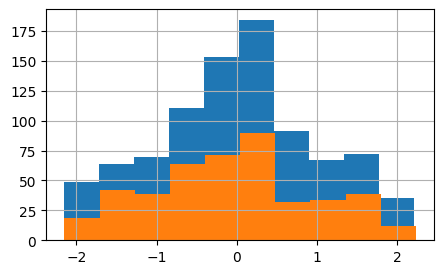

In [ ]:
# Create histograms for y_train_t and y_test_t
pd.Series(y_train_t).hist(figsize=(5, 3))
pd.Series(y_test_t).hist(figsize=(5, 3))

### **Model training**

- Now that our dataset has been sufficiently processed, we can train our baseline linear regression model.

- To improve homoscedasticity of the residuals, we can pass sample weights to the model. This ensures that when the model is trained, observations with larger `charges` are given more importance than those with smaller `charges`. This means that residuals are penalised more heavily for the observations with larger `charges` vs those with smaller `charges`.

- We'll use the target column as the sample weight, but scale it by the minimum value of the `charges` column (so the minimum sample weight is 1):

In [ ]:
# Calculate sample weights for training data
sample_weight = y_train / y_train.min() 


- Finally, we can train our linear regression model by passing it our training set and sample weights:

In [ ]:
# Create a LinearRegression model
lr = LinearRegression()  

# Fit the model to the training data with sample weights
lr.fit(X_train, y_train_t, sample_weight=sample_weight) 


LinearRegression()

### **Model evaluation**

- Now that we've trained our model, we can use it to generate predictions on both our training and test sets:

In [ ]:
# Make predictions on the training data
y_pred_train = lr.predict(X_train)  

# Make predictions on the test data
y_pred_test = lr.predict(X_test)    

- Remember that the model was trained based on a transformed version of the target. Therefore we need to perform the inverse **Yeo-Johnson** transform to convert the model predictions to the original format of the target:

In [ ]:
# Inverse transform the training data predictions and flatten to 1D
y_pred_train = pt.inverse_transform(y_pred_train.reshape(-1, 1))[:, 0]  

# Inverse transform the test data predictions and flatten to 1D
y_pred_test = pt.inverse_transform(y_pred_test.reshape(-1, 1))[:, 0]    


- With our predictions, we can evaluate our model:

In [ ]:
# Calculate the model performance on the training data
base_perf_train = calc_model_performance(y_train, y_pred_train)  


In [ ]:
base_perf_train

{'Root Mean Squared Error': 5964.030079525293,
 'Mean Squared Error': 35569654.78948248,
 'Mean Absolute Error': 4583.192074027691,
 'Mean Absolute Percentage Error': 0.7487184929524602,
 'R Squared': 0.7572131565075644}

In [ ]:
# Calculate the model performance on the test data
base_perf_test = calc_model_performance(y_test, y_pred_test)  


In [ ]:
base_perf_test

{'Root Mean Squared Error': 5752.477398059849,
 'Mean Squared Error': 33090996.215189416,
 'Mean Absolute Error': 4534.422635060568,
 'Mean Absolute Percentage Error': 0.756537151185135,
 'R Squared': 0.774191723271553}

- **So our evaluation metric for the model (RMSE) is ~5964 on the training set and ~5752 on the test set.**

### **Check normality of residuals**

- We can check the normality of residuals using a QQ (quantile-quantile) plot. This plots the value of each actual quantile (from the data) vs the theoretical quantile (assuming a normal distribution). If the data is perfectly normally distributed, you'd expect the datapoints to lie on the line.

- We'll also use a histogram as a more interpretable visualisation of the residuals.

In [ ]:
# Calculate residuals for the training data
residuals_train = y_train - y_pred_train  

# Calculate residuals for the test data
residuals_test = y_test - y_pred_test    


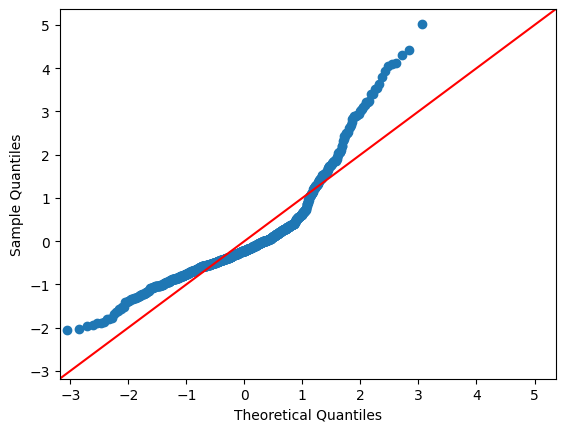

In [ ]:
# Create a quantile-quantile (QQ) plot for training data residuals
fig = sm.qqplot(residuals_train, fit=True, line='45')  


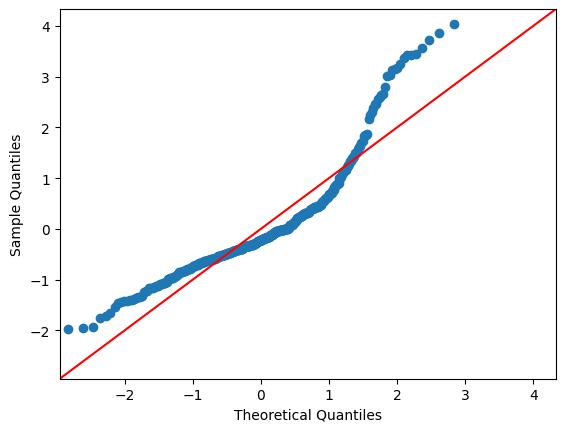

In [ ]:
# Create a quantile-quantile (QQ) plot for test data residuals
fig = sm.qqplot(residuals_test, fit=True, line='45')  

In [ ]:
# Plot the residuals for the training data
plot_residuals(y_true=y_train, y_pred=y_pred_train) 


- Our residuals are not perfectly normally distributed, but are pretty close!

### **Check homoscedasticity**

- We can check for homoscedasticity using a scatterplot, where the target is shown along the x-axis and the residuals are shown along the y-axis. We would expect the datapoints to be equally distributed across the y-axis as x (i.e. the target value) increases:

In [ ]:
# Create a scatter plot of residuals against the true values for the training data
px.scatter(x=y_train, y=residuals_train)  

In [ ]:
# Create a scatter plot of residuals against the true values for the test data
px.scatter(x=y_test, y=residuals_test)  

- Our model exhibits significant heteroscedasticity (i.e. the variance of the residuals is not homogeneous with respect to the target). Since this is a baseline model, we will not spend additional time attempting to improve this.

---

## **Improve on the baseline linear model**

### **Data preprocessing**

- Let's create a new training and test set (since the training and test sets we created for the baseline linear model have been transformed). 

- **Note:** we use the same value for the `random_seed` parameter to ensure the observations in these training and test sets are the same as those in the training and test sets used for the baseline linear model:

#### **Train/test split**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#### **Encoding**

- We still need to encode the categorical features, so let's apply One Hot Encoding again:

In [ ]:
# Create a OneHotEncoder with category names
ohe = OneHotEncoder(use_cat_names=True)

# Apply OneHotEncoder to the training data
X_train = ohe.fit_transform(X_train)

# Apply the same encoder to the testing data
X_test = ohe.transform(X_test)


### **Using Sklearn's `Pipeline` to optimise the model training process**

- The XGBoost algorithm has a number of parameters that can affect the predictive performance of the model. Rather than trying to optimise these parameters manually, we can leverage Sklearn's `Pipeline` class, along with Skopt's `BayesSearchCV` class, to optimise them automatically. 

- We'll also use Recursive Feature Elimination (RFE) in this process to optimise the features that are used by the final XGBoost model. RFE works by fitting a model to all of the features, then calculating the feature importance. The least important feature is removed, then another model is trained using this dataset. This process is repeated until the desired number of features to select is reached.

- Firstly, let's create our RFE and XGBoost regressor instances. We'll also use an XGBoost regressor as the model in our RFE.

In [ ]:
# Create a Recursive Feature Elimination (RFE) object with XGBRegressor as the estimator
rfe = RFE(estimator=XGBRegressor())

# Create an XGBoost Regressor
xgb = XGBRegressor()


- Now we create our pipeline by specifying the list of sequential processes we want to run. The output of each step is passed to the next, with the final step being an estimator (i.e. model). In this case, we want to:
    1. Apply feature selection (via RFE)
    2. Train the XGBoost regressor

 
- We do this by creating a list of tuples, where the first element of each tuple is a label for the step, and the second element is the class to run:

In [ ]:
# Define a list of steps for a processing pipeline
steps = [
    ('rfe', rfe),  # Step 1: RFE (Recursive Feature Elimination)
    ('xgb', xgb)  # Step 2: XGBoost Regressor
]


- Then we pass this to the `Pipeline` class:

In [ ]:
# Create a pipeline with the defined steps
pipe = Pipeline(steps)


- When the `fit` method of the pipeline is called, it will pass the features and target to the RFE `fit_transform` method. The output of this will be passed to the `fit` method of the XGBoost regressor.

- Now that we have our pipeline defined, we can set up our `BayesSearchCV` class to optimise the parameters of the pipeline. Firstly, we need to define the parameters we want to optimise and the space over which the `BayesSearchCV` should search. Note that since we're using a pipeline, we need to define the parameters related to each step by adding a prefix, which is the step's label and two underscores (e.g. `xgb__` for the XGBoost step):

In [ ]:
# Calculate the number of features in X_train
num_features = X_train.shape[1]

# Define search space for hyperparameters
search_spaces = {
    'rfe__n_features_to_select': Integer(1, num_features),  # Number of features selected by RFE
    'xgb__n_estimators': Integer(1, 500),  # Number of trees in XGBoost
    'xgb__max_depth': Integer(2, 8),  # Maximum depth of trees in XGBoost
    'xgb__reg_lambda': Integer(1, 200),  # Regularization term (lambda) in XGBoost
    'xgb__learning_rate': Real(0, 1),  # Learning rate in XGBoost
    'xgb__gamma': Real(0, 2000)  # Gamma parameter in XGBoost
}


- Once our search space for each parameter is defined, we pass this, along with our pipeline, to the `BayesSearchCV` class. This works by:
    1. Creating a cross validation dataset of $n$ folds, where each fold has the same number of observations. For example, for 3 folds, the original dataset is randomly split into 3 subsets.

    2. The following steps are then applied across all folds:
        1. Create a sub-training set comprising of $n$-1 folds and a sub-validation set comprising of the remaining fold. 
        2. Train the pipeline using a given set of parameters on the sub-training set.
        3. Use this trained pipeline to make predictions on the sub-validation set and calculate the scoring metric (i.e. the RMSE in this case).

    3. Calculate the mean of the scoring metric across all sub-validation sets.

    4. The algorithm then uses a bayesian approach to select the next set of parameters which will maximise the mean scoring metric across all sub-validation sets.
    
    5. Steps 2-4 are repeated until a threshold is reached (see the `n_iter` parameter in the `BayesSearchCV` class).

**BayesSearchCV**

- This method use stepwise Bayesian Optimization to investigate the most promising problem-space hyperparameters.
In large problem spaces, Bayesian Optimization determines the minimum to an objective function. Under the hood, it employs Gaussian Process regression on the objective function to do this. In our example, the objective function is to find the optimal model output given the model parameters we specify.
The Bayesian Optimization approach has the advantage of providing a significantly greater range of possible values because it automatically explores the most promising regions and discards the less promising ones over time.

- A simple grid-search would take a lot of time to exhaust all possible values.
Because we move much more efficiently, we can create a much larger playing field.

- Bayesian Optimization keeps track of previous evaluation results, which they use to build a probabilistic model mapping hyperparameters to the probability of a score on the objective function. It is basically finding out the most promising hyperparameters by building a probability model of the objective function.

- P = (score | hyperparameters)

- This probability function works as a "surrogate" for objective functions. Hyperparameters are tested on this and those who stand out are then tested on the trtue objective function which would a function that minimizes error. The results then updates the surrogate function again and in this way, bayesian optimization selects parameters in an informed manner.

In [ ]:
# Create a BayesSearchCV object for hyperparameter optimization
xgb_bs_cv = BayesSearchCV(
    estimator=pipe,  # Pipeline with RFE and XGBoost
    search_spaces=search_spaces,  # Search spaces for hyperparameters
    scoring='neg_root_mean_squared_error',  # Scoring metric (negative RMSE)
    n_iter=75,  # Number of optimization iterations
    cv=3,  # Number of cross-validation folds
    n_jobs=-1,  # Utilize all available CPU cores
    verbose=1,  # Display optimization progress
    random_state=0  # Ensure reproducibility
)


- Now we can initiate the parameter optimisation process using our training set:

In [ ]:
# Fit the BayesSearchCV to the training data
xgb_bs_cv.fit(X_train, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('rfe',
                                         RFE(estimator=XGBRegressor(base_score=None,
                                                                    booster=None,
                                                                    callbacks=None,
                                                                    colsample_bylevel=None,
                                                                    colsample_bynode=None,
                                                                    colsample_bytree=None,
                                                                    early_stopping_rounds=None,
                                                                    enable_categorical=False,
                                                                    eval_metric=None,
                                                                    feature_types=None,
                                                                    gamma=None,
                                                                    gpu_id=None,
                                                                    grow_policy=None,
                                                                    importance_type=None,
                                                                    interaction...
                             'xgb__gamma': Real(low=0, high=2000, prior='uniform', transform='normalize'),
                             'xgb__learning_rate': Real(low=0, high=1, prior='uniform', transform='normalize'),
                             'xgb__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'xgb__n_estimators': Integer(low=1, high=500, prior='uniform', transform='normalize'),
                             'xgb__reg_lambda': Integer(low=1, high=200, prior='uniform', transform='normalize')},
              verbose=1)

### **Model evaluation**

- Let's first look at how each parameter set performed across each fold. Each record in the dataset corresponds to a parameter set that was tested. We rank by `rank_test_score` to ensure the best performing parameter set is shown at the top:

In [ ]:
# Create a DataFrame from the cross-validation results and sort it by the rank of the test score
cv_results = pd.DataFrame(xgb_bs_cv.cv_results_).sort_values('rank_test_score')


In [ ]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfe__n_features_to_select,param_xgb__gamma,param_xgb__learning_rate,param_xgb__max_depth,param_xgb__n_estimators,param_xgb__reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
74,0.210413,0.007992,0.003452,0.000428,9,81.030708,0.300229,2,28,1,"{'rfe__n_features_to_select': 9, 'xgb__gamma':...",-4002.016332,-4887.256613,-4752.861776,-4547.378240,389.512688,1
70,0.198634,0.021934,0.002215,0.000316,9,768.940056,0.309929,2,28,7,"{'rfe__n_features_to_select': 9, 'xgb__gamma':...",-4051.695356,-4882.385226,-4789.933237,-4574.671273,371.720953,2
73,0.216079,0.010115,0.003029,0.000815,9,126.308767,0.280953,2,28,17,"{'rfe__n_features_to_select': 9, 'xgb__gamma':...",-4032.121367,-4892.800005,-4815.258773,-4580.060048,388.742211,3
44,0.180053,0.017219,0.004374,0.001330,10,716.433044,0.130805,3,157,173,"{'rfe__n_features_to_select': 10, 'xgb__gamma'...",-4094.673399,-4855.374625,-4824.489405,-4591.512476,351.544474,4
69,0.196313,0.008375,0.003671,0.002012,9,0.0,0.293332,2,26,14,"{'rfe__n_features_to_select': 9, 'xgb__gamma':...",-4081.095245,-4873.125324,-4823.719190,-4592.646586,362.283336,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,0.547277,0.009183,0.002193,0.000246,1,312.876301,0.896333,6,167,1,"{'rfe__n_features_to_select': 1, 'xgb__gamma':...",-7471.995189,-7831.681382,-7536.859234,-7613.511935,156.525327,71
52,0.565069,0.006403,0.006119,0.001845,1,0.0,0.116112,2,50,197,"{'rfe__n_features_to_select': 1, 'xgb__gamma':...",-7813.962203,-7678.661159,-7800.483816,-7764.369059,60.853923,72
12,0.308633,0.009048,0.002503,0.000407,7,518.15103,0.724904,2,1,50,"{'rfe__n_features_to_select': 7, 'xgb__gamma':...",-11053.574485,-9677.749284,-10559.356993,-10430.226921,569.051654,73
19,0.360109,0.003769,0.002882,0.000234,6,1015.590087,0.647677,2,1,54,"{'rfe__n_features_to_select': 6, 'xgb__gamma':...",-11955.230131,-10462.304749,-11375.061083,-11264.198654,614.504900,74


- Now, let's generate predictions on both our training and test sets using the model trained with our best performing parameters:

In [ ]:
# Make predictions on the training data using the XGBoost model from BayesSearchCV
y_pred_train_xgb = xgb_bs_cv.predict(X_train)

# Make predictions on the testing data using the XGBoost model from BayesSearchCV
y_pred_test_xgb = xgb_bs_cv.predict(X_test)


- With our predictions, we can evaluate our model:

In [ ]:
# Calculate the performance metrics for the training data predictions using a custom function
xgb_perf_train = calc_model_performance(y_train, y_pred_train_xgb)


In [ ]:
xgb_perf_train

{'Root Mean Squared Error': 4186.661638235022,
 'Mean Squared Error': 17528135.673068758,
 'Mean Absolute Error': 2326.2427185848564,
 'Mean Absolute Percentage Error': 0.2666692801056923,
 'R Squared': 0.8803586720883821}

In [ ]:
# Calculate the performance metrics for the testing data predictions using a custom function
xgb_perf_test = calc_model_performance(y_test, y_pred_test_xgb)


In [ ]:
xgb_perf_test

{'Root Mean Squared Error': 4466.904446257581,
 'Mean Squared Error': 19953235.331995748,
 'Mean Absolute Error': 2483.459321456837,
 'Mean Absolute Percentage Error': 0.28813330823252775,
 'R Squared': 0.8638419449153072}

## **Comparison to the baseline model**

#### Compare evaluation metrics

In [ ]:
# Compare model performance for training data
perf_comp_train = compare_model_performance(base_perf_train, xgb_perf_train)

# Compare model performance for test data
perf_comp_test = compare_model_performance(base_perf_test, xgb_perf_test)


In [ ]:
perf_comp_train

,base,new,abs_improvement,perc_improvement
Root Mean Squared Error,5964.03,4186.66,-1777.37,-29.80
Mean Squared Error,35569654.79,17528135.67,-18041519.12,-50.72
Mean Absolute Error,4583.19,2326.24,-2256.95,-49.24
Mean Absolute Percentage Error,0.75,0.27,-0.48,-64.00
R Squared,0.76,0.88,0.12,15.79


In [ ]:
perf_comp_test

,base,new,abs_improvement,perc_improvement
Root Mean Squared Error,5752.48,4466.90,-1285.58,-22.35
Mean Squared Error,33090996.22,19953235.33,-13137760.89,-39.70
Mean Absolute Error,4534.42,2483.46,-2050.96,-45.23
Mean Absolute Percentage Error,0.76,0.29,-0.47,-61.84
R Squared,0.77,0.86,0.09,11.69


- **We can observe a significant decrease the errors and an increase in the $R^2$ value for the XGBoost model.**

- **Most importantly, the RMSE (our model evaluation metric that we defined at the beginning of the exercise) has decreased by ~22% on the test set!**

---

## **Presenting the results to non-technical stakeholders**

- We often need to communicate the performance of a model to non-technical stakeholders. This means metrics like RMSE aren't very useful as they're not intuitive. 

- Instead, let's show what percentage of our model's predictions are within a certain range of the actual `charges` value. 

- For example, the percentage of our model's predictions (on the test set) that are within $2000 of the actual `charges` value is:

In [ ]:
# Calculate predictions within a residual range for the test data
calc_preds_in_residual_range(
    y_true=y_test,  
    y_pred=y_pred_test_xgb,  # Predicted values from the XGBoost model for the test data
    range_=2000  # The specified residual range for which predictions are calculated
)


65.61085972850678

- We can also show what percentage of our model's predictions are within a certain *percentage* of the actual `charges` value.

- For example, the percentage our model's predictions (on the test set) that are within 20% of the actual `charges` value is:

In [ ]:
# Calculate predictions within a percentage range
calc_preds_in_residual_perc_range(y_true=y_test, y_pred=y_pred_test_xgb, perc_range=20)


53.39366515837104

## **Conclusion**
 
- We understood the importance of machine learning in insurance pricing forecast.
 
- We learned about XGBoost algorithm in detail and understood how to implement it with sklearn's pipeline object and bayesian optimization.
 
- We also learned how to communicate the performance of a model to non-technical stakeholders.

---